# K_Means Clustering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("iris_nan_label.csv")
df.head()
# label olmadığına dikkat edelim.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()
#outlier değerler kümeleme kalitesini bozar.Eğer datamızda outlier değerler varsa clustering algoritmalarında göz ardı edemeyiz.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


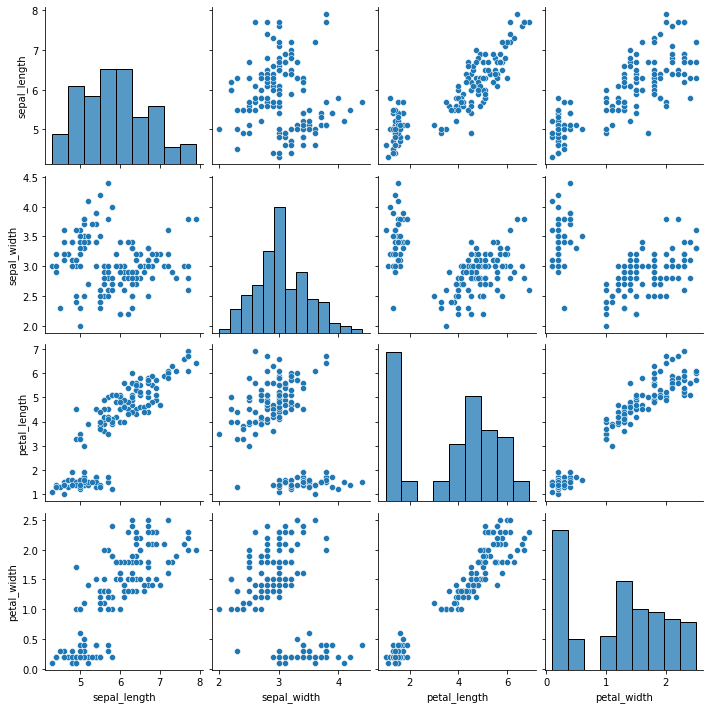

In [5]:
sns.pairplot(df)
plt.show()

# datamız kümelemeye meyilli mi değil mi meyilliyse kaç kümeye bölebilirim ? Scatterplot'a bakarak bir fikir edinebiliriz.
# minimal intra cluster distance and maximal inter cluster distance diye belirttiğimiz ideal kümeleme mantığını
# clustering porblemlerinin her aşamasında aklımızdan çıkarmamalıyız.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

from sklearn.preprocessing import StandardScaler

## K_Means Clustering

In [6]:
X = df.copy()
# unsupervised learning olduğundan train-test split vs yok !

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X.shape

(150, 4)

In [9]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

# n_clusters=8 (default)
# n_init : centroid'leri random olarak atama işlemini kaç kere yapacağını belirtiyoruz 
# init='k-means++' : (centroid'leri random olarak atıyor normalde algoritma) 'k-means++' ile biz diyoruz ki algoritmaya 
# centroidleri random olarak ata ama  verilerin yoğun olduğu yerlere centroidleri atayarak başla demiş oluyoruz.
# max_iter=300 -------> büyük datalarda bunu artırma ihtiyacı hasıl olabilir.
# random_state: kümelerimizin aynı olması için.Buradaki aynılık 1 dediği bir kümeye bir sonrakinde 0 demesin diye 
# random_state'i sabitliyoruz.

In [10]:
K_means_model.fit(X)
# fit -------------> algoritma patterneleri tespit ediyor burada (5 cluster olacak şekilde)

KMeans(n_clusters=5, random_state=42)

In [11]:
K_means_model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [12]:
K_means_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [13]:
K_means_model.labels_
# fit yaptıktan sonra doğrudan .labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

#### Şimdiye kadar k-means algoritmasını tanımak için işlemler yaptık asıl işlemlere şimdi başlayacağız :

## Hopkins test

In [14]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz  pyclustertend'ın hopkins kütüphanesinde var.Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız . Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [15]:
# hopkins : elimdeki data clusteringe ne kadar yatkın bunu ölçen istatistiksel bir yöntem.
# 0.5'den küçükse kümelemeye yatkındır.

In [16]:
X.shape

(150, 4)

In [17]:
hopkins(X, X.shape[0])

# hopkins 0'a yaklaşıkça datam kümelemeye yatkın diyebiliriz.Datam çok büyük olsaydı,X.shape[0] yerine
# buraya bir  sampling_size da belirtebilirdik.
# her çalıştırıldığında farklı sonuç çıkmasının nedeni; arka planda X'den rastgele gözlemler almasıdır.

0.16943717727852858

In [18]:
hopkins(X, 50)

0.16593146072226714

# Choosing The Optimal Number of Clusters

## Elbow metod

In [19]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

# range'i 2'den başlattığımıza dikkat edelim eğer 1'den başlatırsak elbow'dan optimal k olarak hep 2'yi görürüz.
# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia'nın sadece küme içine odaklandığına dikkat edelim.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.

Text(0.5, 1.0, 'elbow method')

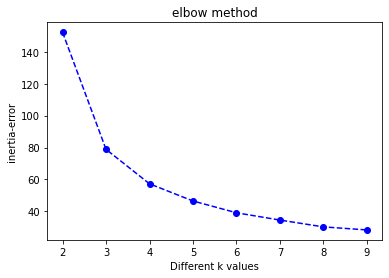

In [20]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [21]:
# elbow methodu inertia üzerinden hareket eder diğer kümelerle olan uzaklığa bakmaz.
# elbow method'una göre sert düşüşün durduğu "ilk" nokta optimal k'dır.bazı datalarda 2-3 tane sert düşüş olabilir.
# inertia'nın en minimum olduğu nokta demek gözlem sayısı kadar küme demektir bu da clustering'in mantığına aykırı.
# range(2,150) yaparak bunu gözlemleyebilirsiniz.

In [22]:
ssd # sum of squared distance

[152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.186555194805198,
 28.28937085137085]

In [23]:
-pd.Series(ssd).diff()
# ssd.diff() yaparsak hata alırız çünkü diff() series'e has bir metottur.ve kendinden öncekiyle fark alır.

0          NaN
1    73.496510
2    21.622968
3    10.782291
4     7.406195
5     4.570491
6     4.282941
7     1.897184
dtype: float64

In [24]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


<AxesSubplot:>

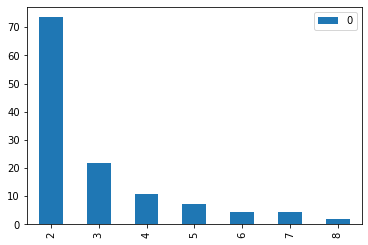

In [25]:
df_diff[1:].plot(kind='bar')

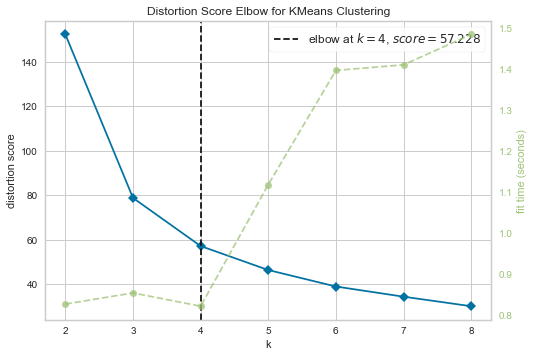

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof();

# yellowbrick sert düşüşün durduğu ilk noktayı değil anlamlı bir düşüşün durduğu noktayı dikkate alarak bir tavsiye de bulunur.

In [27]:
# scatterplot'a göre optimal k 2 gibiydi , elbow optimal k olarak 3 önerdi , yellowbrickte kendi mantığıyla 4 önerdi .
# Ama biz biliyoruz ki elbow method inertia'yı dikkate alarak çalışıyor ideal kümelemede bizim için kümeler arası 
# mesafe de önemliydi.Bundan dolayı Silhouette analysis yaparak optimal k için bir tavsiye de buradan alacağız.

## Silhouette analysis

In [28]:
from sklearn.metrics import silhouette_score
# silhouette_score ; yaptığımız kümelemenin kalitesini ölçen bir metriktir, inertia her küme kendi içerisinde centroidi  
# etrafında ne sıklıkta kümelenmiş bunu ölçüyor ( küme içi mesafelere bakıyor yani) Ama bizim ideal clusteringten anlamamız
# gereken bir de  maximal inter cluster distance idi  ve silhouette_score işte bu durumu  hesaba katıyor.

In [29]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [30]:
silhouette_score(X, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.48874888709310654

In [31]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.34974816211612186
For n_clusters=8, the silhouette score is 0.3574536925852728


In [32]:
# n_clusters=2 'de silhouette score yüksek AMA ;
# cluster sayısını 2 seçersem inertia değeri çok yüksek yani kümelerim geniş bir alana yayılacak.
# O yüzden n_clusters=3 ve n_clusters=4 arasındaki silhouette score'ları karşılaştırarak bir karar veriyoruz.
# burada hesaplanan silhouette score bütün gözlemlerin ortalamasıdır (clusterlara göre)

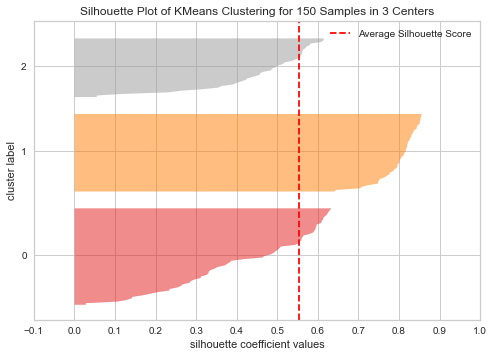

In [33]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, 
                random_state=42)          # n_clusters=3'e karar verdik !
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# yellowbrick'in bu özelliğiyle bir her bir cluster'ın ayrı ayrı silhouette score'larını görebiliyoruz.

In [34]:
model3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [35]:
visualizer.silhouette_samples_
# Gözlemlerin ayrı ayrı silhouette score'larını da görebiliriz.

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [36]:
labels_1 = (model3.labels_ == 1)

In [37]:
labels_1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [38]:
visualizer.silhouette_samples_[labels_1] # silhoutte scores of 1 classes

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835])

In [39]:
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.7981404884286227

In [40]:
## bu işlemi 3 cluster için de yapalım : 

In [41]:
#model3.n_clusters
for i in range(3):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.4173199215409337
mean silhouette score for label 1    : 0.7981404884286227
mean silhouette score for label 2    : 0.45110506043401305
mean silhouette score for all labels : 0.5528190123564102


## Building the model based on the optimal number of clusters

####  Biz optimal k'yı 3 olarak düşünüyoruz bir de işin uzmanına soracağız eğer o da 3 derse 3 ile yolumuza devam edeceğiz .Ancak uzman hayır burada 4 çeşit bitki var derse 4 ile devam etmek  <u>***zorundayız.*** </u>

![image.png](attachment:image.png)

In [42]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [43]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
clusters = model.labels_

In [45]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
X["predicted_clusters"] = clusters
# X'e tahmin edilen cluster'ları bir column olarak ekiyoruz.

In [47]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:
labels = pd.read_csv("label.csv")            
labels 

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [49]:
labels.value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [50]:
X["labels"] = labels
# gerçek label'larımızı da X'e ekliyoruz.

In [51]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [52]:
ct = pd.crosstab(X.predicted_clusters, X.labels)
ct
# kmeans algoritmamızın tahmin ettiği cluster'lar ile label'ları karşılaştıracağız şimdi pd.crosstab ile.

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


##### benim elimde label'larım olduğundan artık adjusted_rand_score'a bakabilirim :

## Adjust Rand Score

In [53]:
from sklearn.metrics import adjusted_rand_score
# adjusted_rand_score ; accuracy değildir adjusted_rand_score hataları cezalandırır.
# adjusted_rand_score'a bakabilmek için elimizde bir şekilde gerçek label'ların en azından belirli bir kısmının olması lazım.

In [54]:
adjusted_rand_score(X.labels, X.predicted_clusters)
# bu skor da 1'e ne kadar yakınsa kümeleme kalitem de o kadar yakındı.

0.7302382722834697

## Visualization Clusters

In [55]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

# scatter plot çizebilmek için string type'ları numeric'e çeviriyorum crosstab'e göre bu dönüşümleri yapıyorum.

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

In [56]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


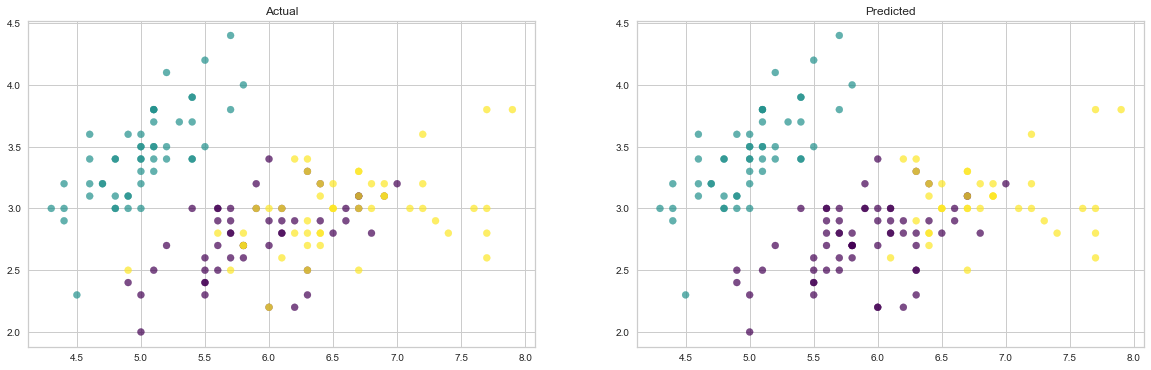

In [57]:
plt.figure(figsize = (20,6))

# rastgele 2 feature'ı seçip birbirleriyle olan dağılımına bakcağız
plt.subplot(121)
plt.scatter(X["sepal_length"], 
            X["sepal_width"],
            c=X_labels,  # c : renklendirme parametresi
            cmap="viridis",
            alpha=0.7)
plt.title("Actual")                             

plt.subplot(122)
plt.scatter(X["sepal_length"],
            X["sepal_width"], 
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)
plt.title("Predicted");

In [58]:
## hataların olduğu yerler datanın girift olduğu yerler olduğuna dikkat edelim.

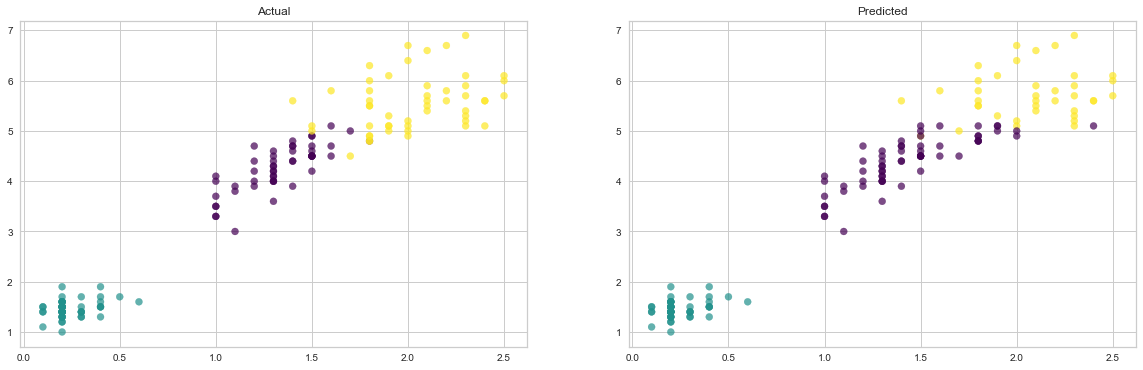

In [59]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["petal_width"],
            X["petal_length"], 
            c=X_labels, 
            cmap="viridis",
            alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["petal_width"], 
            X["petal_length"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)
plt.title("Predicted");

In [60]:
centers = model.cluster_centers_
centers
# feature'ların centoridlerinin koordinatları : 

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [61]:
centers[:,0] # centers of sepal_length feature
# her cluster için kordinat bilgileri:

array([5.9016129, 5.006    , 6.85     ])

In [62]:
centers[:,1] # centers of sepal_width feature

array([2.7483871 , 3.428     , 3.07368421])

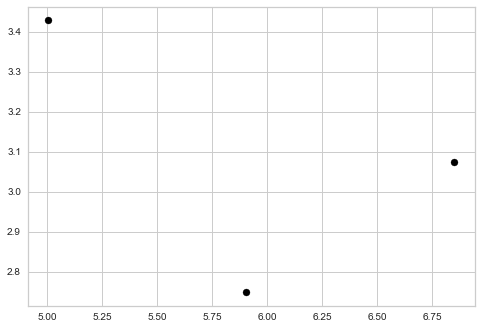

In [63]:
plt.scatter(centers[:,0], centers[:,1], c="black")

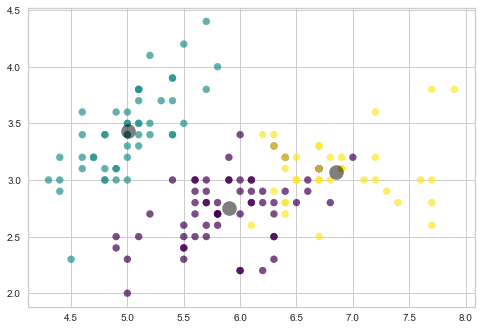

In [64]:
plt.scatter(X["sepal_length"],
            X["sepal_width"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1], 
            c='black', 
            s=200, 
            alpha=0.5)

## Remodeling according to discriminating features

In [65]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [66]:
X.iloc[:, :-1].head() 
# labels'ı çıkarıp algoritmanın tahmin ettiği clusterlar üzerinden en iyi ayrımı yapan feature'ları seçeceğiz !

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [67]:
clus_pred = X.iloc[:, :-1].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


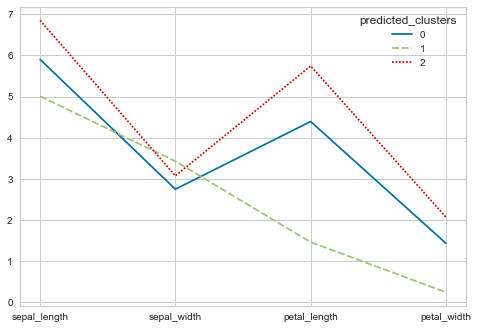

In [68]:
sns.lineplot(data = clus_pred);

## en iyi ayrışımın olduğu ve hangi featurelarda datam giriftleşiyor onu görmek için çiziyoruz bu lineplot'u.

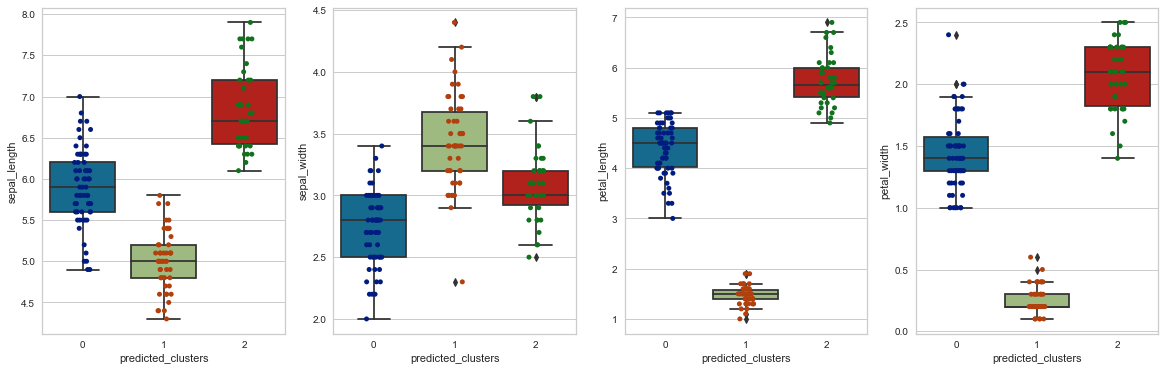

In [69]:
# petal_length ve petal_width feature'ları ile clusterları daha iyi ayırabilirim diye düşünüyorum(lineplot'a göre)
# bir de boxplot ile bunu gözlemleyelim :
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "predicted_clusters", data = X)
sns.stripplot(y = "sepal_length", x = "predicted_clusters", data = X, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "predicted_clusters", data = X)
sns.stripplot(y = "sepal_width", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(143)
sns.boxplot(y = "petal_length", x = "predicted_clusters", data = X)
sns.stripplot(y = "petal_length", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(144)
sns.boxplot(y = "petal_width", x = "predicted_clusters", data = X)
sns.stripplot(y = "petal_width", x = "predicted_clusters", data = X, palette="dark");

In [70]:
# petal_length ve petal_width feature'ları ile clusterları daha iyi ayırabileceğimi box-plot ile de gözlemlemiş oldum.

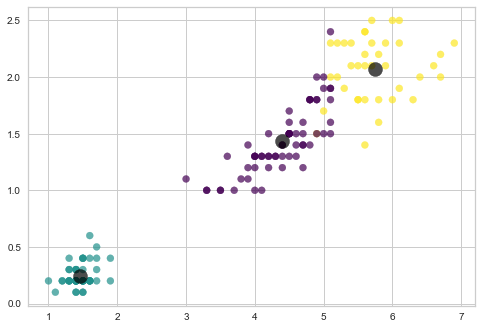

In [71]:
plt.scatter(X["petal_length"],
            X["petal_width"], 
            c=X.predicted_clusters,
            cmap="viridis",
            alpha =0.7)
plt.scatter(centers[:, 2],
            centers[:, 3], 
            c='black', 
            s=200, 
            alpha=0.7)

In [72]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins test

In [73]:
hopkins(X2, X2.shape[0])

0.09398091466758139

In [74]:
#  4 feature ile hopkins test sonucum 0.16916864700671128'idi 2 feature ile  kümelemeye daha yatkın bir durum oluştu.

## Elbow metod

In [75]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

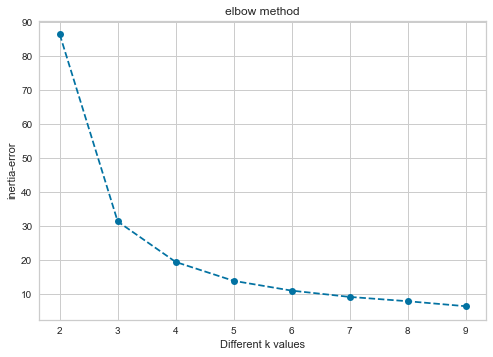

In [76]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [77]:
ssd

[86.39021984551395,
 31.371358974358976,
 19.465989010989013,
 13.91690875790876,
 11.040239971910452,
 9.193866732047512,
 7.924763772175537,
 6.456494541406307]

In [78]:
-pd.Series(ssd).diff()

0          NaN
1    55.018861
2    11.905370
3     5.549080
4     2.876669
5     1.846373
6     1.269103
7     1.468269
dtype: float64

In [79]:
df_diff_1 =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff_1

,0
1,NaN
2,55.018861
3,11.905370
4,5.549080
5,2.876669
6,1.846373
7,1.269103
8,1.468269


<AxesSubplot:>

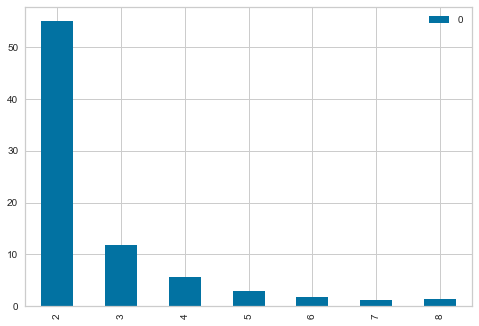

In [80]:
df_diff_1[1:].plot(kind='bar')

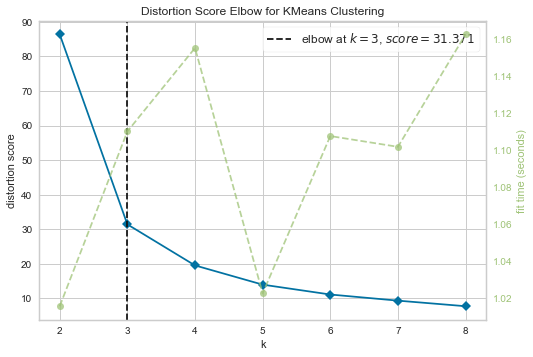

In [81]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [82]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5767097832601947
For n_clusters=7, the silhouette score is 0.5640984340524553
For n_clusters=8, the silhouette score is 0.5902255624998716


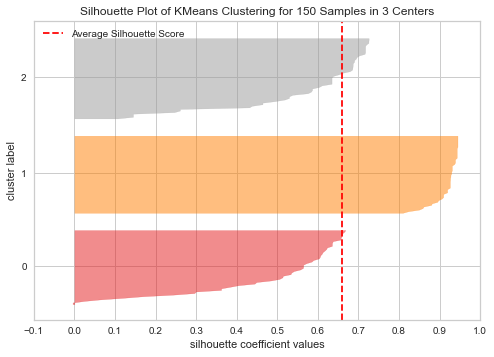

In [83]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [84]:
for i in range(model3.n_clusters):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.4850074375102458
mean silhouette score for label 1    : 0.9187718817796753
mean silhouette score for label 2    : 0.5740971186566872
mean silhouette score for all labels : 0.6604800083974887


## Building the model based on the optimal number of clusters

In [85]:
final_model = KMeans(n_clusters=3,
                     random_state=42)
final_model.fit_predict(X2)
# X2'yi kullandığımıza (2 feature) dikkat edelim.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
#final_model.labels_

In [87]:
X2["labels"] = labels

In [88]:
X2["predicted_clusters"] = final_model.labels_

In [89]:
X2.head()

,petal_length,petal_width,labels,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

In [90]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)
# adjusted_rand_score'um da görüldüğü üzere arttı . (öncekinde 0.73 idi.)

0.8856970310281228

## Compare results

In [91]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.labels)

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [92]:
# ct for all features
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Prediction cluster of new data

In [93]:
new_data = [[1.7, 0.2]]

In [94]:
final_model.predict(new_data)

array([1])

# 1 cluster'ına atama yapıldı.